In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
from keras.datasets import fashion_mnist
import numpy as np

(x_train, _), (x_test, _) = fashion_mnist.load_data()

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = np.reshape(x_train, (len(x_train), 28, 28, 1))
x_test = np.reshape(x_test, (len(x_test), 28, 28, 1))

noise_factor = 0.5
x_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape) 
x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape) 

x_train_noisy = np.clip(x_train_noisy, 0., 1.)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)

4423680/4422102 [==============================] - 0s 0us/step


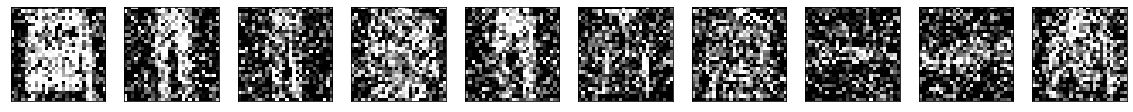

In [4]:
import matplotlib.pyplot as plt
n = 10
plt.figure(figsize=(20, 2))
for i in range(1, n + 1):
    ax = plt.subplot(1, n, i)
    plt.imshow(x_test_noisy[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [5]:
# Try to figure out what the labels are by looking at it

In [6]:
import keras
from keras import layers
from keras import regularizers

In [7]:
input_img = keras.Input(shape=(28, 28, 1))

x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(input_img)
x = layers.MaxPooling2D((2, 2), padding='same')(x)
x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(x)
encoded = layers.MaxPooling2D((2, 2), padding='same')(x)

# At this point the representation is (7, 7, 32)

x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(encoded)
x = layers.UpSampling2D((2, 2))(x)
x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = layers.UpSampling2D((2, 2))(x)
decoded = layers.Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

autoencoder = keras.Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

In [8]:
autoencoder.fit(x_train_noisy, x_train,
                epochs=100,
                batch_size=128,
                shuffle=True,
                validation_data=(x_test_noisy, x_test))

Epoch 1/100
469/469 [==============================] - 6s 6ms/step - loss: 0.3926 - val_loss: 0.3106
Epoch 2/100
469/469 [==============================] - 2s 5ms/step - loss: 0.3073 - val_loss: 0.3055
Epoch 3/100
469/469 [==============================] - 2s 5ms/step - loss: 0.3021 - val_loss: 0.3026
Epoch 4/100
469/469 [==============================] - 2s 5ms/step - loss: 0.2997 - val_loss: 0.3007
Epoch 5/100
469/469 [==============================] - 2s 5ms/step - loss: 0.2975 - val_loss: 0.3001
Epoch 6/100
469/469 [==============================] - 3s 6ms/step - loss: 0.2964 - val_loss: 0.2981
Epoch 7/100
469/469 [==============================] - 2s 5ms/step - loss: 0.2957 - val_loss: 0.2967
Epoch 8/100
469/469 [==============================] - 2s 5ms/step - loss: 0.2939 - val_loss: 0.2962
Epoch 9/100
469/469 [==============================] - 2s 5ms/step - loss: 0.2935 - val_loss: 0.2959
Epoch 10/100
469/469 [==============================] - 3s 5ms/step - loss: 0.2933 - val_lo

469/469 [==============================] - 2s 5ms/step - loss: 0.2879 - val_loss: 0.2898
Epoch 82/100
469/469 [==============================] - 3s 5ms/step - loss: 0.2876 - val_loss: 0.2900
Epoch 83/100
469/469 [==============================] - 2s 5ms/step - loss: 0.2868 - val_loss: 0.2896
Epoch 84/100
469/469 [==============================] - 2s 5ms/step - loss: 0.2867 - val_loss: 0.2895
Epoch 85/100
469/469 [==============================] - 2s 5ms/step - loss: 0.2878 - val_loss: 0.2896
Epoch 86/100
469/469 [==============================] - 2s 5ms/step - loss: 0.2865 - val_loss: 0.2897
Epoch 87/100
469/469 [==============================] - 3s 6ms/step - loss: 0.2879 - val_loss: 0.2896
Epoch 88/100
469/469 [==============================] - 2s 5ms/step - loss: 0.2868 - val_loss: 0.2896
Epoch 89/100
469/469 [==============================] - 2s 5ms/step - loss: 0.2870 - val_loss: 0.2895
Epoch 90/100
469/469 [==============================] - 2s 5ms/step - loss: 0.2877 - val_loss: 

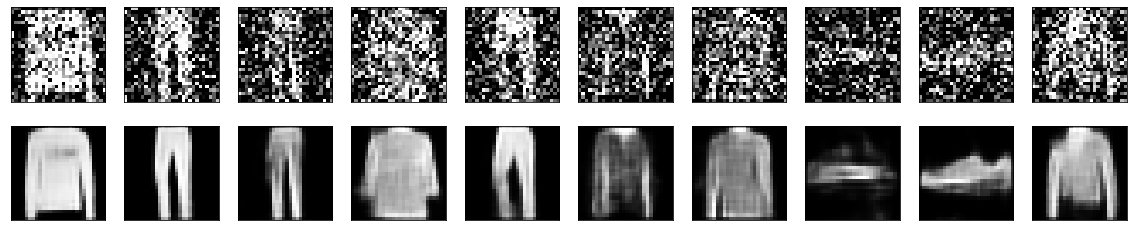

In [9]:
decoded_imgs = autoencoder.predict(x_test_noisy)

n = 10
plt.figure(figsize=(20, 4))
for i in range(1, n + 1):
    # Display original
    ax = plt.subplot(2, n, i)
    plt.imshow(x_test_noisy[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstruction
    ax = plt.subplot(2, n, i + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [10]:
# LOOK AT THAAAAAAT!!!!!! THAT'S CRAZY!!!!!

In [11]:
# Now lets get the VAE goin

In [13]:
original_dim = 28 * 28
intermediate_dim = 64
latent_dim = 2

inputs = keras.Input(shape=(original_dim,))
h = layers.Dense(intermediate_dim, activation='relu')(inputs)
z_mean = layers.Dense(latent_dim)(h)
z_log_sigma = layers.Dense(latent_dim)(h)

In [14]:
from keras import backend as K

def sampling(args):
    z_mean, z_log_sigma = args
    epsilon = K.random_normal(shape=(K.shape(z_mean)[0], latent_dim),
                              mean=0., stddev=0.1)
    return z_mean + K.exp(z_log_sigma) * epsilon

z = layers.Lambda(sampling)([z_mean, z_log_sigma])

In [15]:
# Create encoder
encoder = keras.Model(inputs, [z_mean, z_log_sigma, z], name='encoder')

# Create decoder
latent_inputs = keras.Input(shape=(latent_dim,), name='z_sampling')
x = layers.Dense(intermediate_dim, activation='relu')(latent_inputs)
outputs = layers.Dense(original_dim, activation='sigmoid')(x)
decoder = keras.Model(latent_inputs, outputs, name='decoder')

# instantiate VAE model
outputs = decoder(encoder(inputs)[2])
vae = keras.Model(inputs, outputs, name='vae_mlp')

In [16]:
reconstruction_loss = keras.losses.binary_crossentropy(inputs, outputs)
reconstruction_loss *= original_dim
kl_loss = 1 + z_log_sigma - K.square(z_mean) - K.exp(z_log_sigma)
kl_loss = K.sum(kl_loss, axis=-1)
kl_loss *= -0.5
vae_loss = K.mean(reconstruction_loss + kl_loss)
vae.add_loss(vae_loss)
vae.compile(optimizer='adam')

In [ ]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

vae.fit(x_train, x_train,
        epochs=100,
        batch_size=32,
        validation_data=(x_test, x_test))

Epoch 1/100
1875/1875 [==============================] - 4s 2ms/step - loss: 326.1522 - val_loss: 277.3997
Epoch 2/100
1875/1875 [==============================] - 4s 2ms/step - loss: 274.5745 - val_loss: 271.5090
Epoch 3/100
1875/1875 [==============================] - 4s 2ms/step - loss: 269.3658 - val_loss: 267.9701
Epoch 4/100
1875/1875 [==============================] - 4s 2ms/step - loss: 266.6570 - val_loss: 266.7271
Epoch 5/100
1875/1875 [==============================] - 4s 2ms/step - loss: 264.9034 - val_loss: 264.8868
Epoch 6/100
1875/1875 [==============================] - 4s 2ms/step - loss: 263.4116 - val_loss: 263.7710
Epoch 7/100
1875/1875 [==============================] - 4s 2ms/step - loss: 262.7058 - val_loss: 262.9992
Epoch 8/100
1875/1875 [==============================] - 4s 2ms/step - loss: 260.9867 - val_loss: 262.8599
Epoch 9/100
1875/1875 [==============================] - 4s 2ms/step - loss: 260.6305 - val_loss: 262.0550
Epoch 10/100
1525/1875 [=============

In [ ]:
# Display a 2D manifold of the digits
n = 15  # figure with 15x15 digits
digit_size = 28
figure = np.zeros((digit_size * n, digit_size * n))
# We will sample n points within [-15, 15] standard deviations
grid_x = np.linspace(-15, 15, n)
grid_y = np.linspace(-15, 15, n)

for i, yi in enumerate(grid_x):
    for j, xi in enumerate(grid_y):
        z_sample = np.array([[xi, yi]])
        x_decoded = decoder.predict(z_sample)
        digit = x_decoded[0].reshape(digit_size, digit_size)
        figure[i * digit_size: (i + 1) * digit_size,
               j * digit_size: (j + 1) * digit_size] = digit

plt.figure(figsize=(10, 10))
plt.imshow(figure)
plt.show()